Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [52]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('data1/enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [53]:
# Define a function that reads csv and returns a list of lists or list of dicts.

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

In [54]:
# Use the fuction to read the .csv

enrolments = read_csv('data1/enrollments.csv')
engagement = read_csv('data1/daily_engagement.csv')
project_submissions = read_csv('data1/project_submissions.csv')

In [55]:
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': u'2015-01-14',
 u'days_to_cancel': u'65',
 u'is_canceled': u'True',
 u'is_udacity': u'True',
 u'join_date': u'2014-11-10',
 u'status': u'canceled'}

In [56]:
engagement[0]

{u'acct': u'0',
 u'lessons_completed': u'0.0',
 u'num_courses_visited': u'1.0',
 u'projects_completed': u'0.0',
 u'total_minutes_visited': u'11.6793745',
 u'utc_date': u'2015-01-09'}

In [57]:
project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': u'2015-01-16',
 u'creation_date': u'2015-01-14',
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

## Fixing Data Types

In [58]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [59]:
# Clean up the data types in the engagement table
for engagement_record in engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [60]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [61]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
# WORKING WITH DICT (ACTUALLY A LIST OF DICT)
for engagement_record in engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del engagement_record['acct']
engagement[0]

{'account_key': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [62]:
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students

In [63]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.
print(len(enrollments))
unique_enrol_students = get_unique_students(enrollments)
print(len(unique_enrol_students))

1640
1302


In [64]:
print(len(engagement))
unique_engage_students = get_unique_students(engagement)
print(len(unique_engage_students))

136240
1237


In [65]:
print(len(project_submissions))
unique_project_submissions = get_unique_students(project_submissions)
print(len(unique_project_submissions))

3642
743


In [66]:
engagement[0]['account_key']

u'0'

## Problems in the Data

## Missing Engagement Records

In [67]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
count = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engage_students:
        count += 1
        print (enrollment)
        if count > 2:
            break

# This students enrolled and cancelled their enrollments in the same day!!!

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 13, 0, 0), u'account_key': u'871', u'cancel_date': datetime.datetime(2014, 11, 13, 0, 0), u'days_to_cancel': 0}
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 15, 0, 0), u'account_key': u'1218', u'cancel_date': datetime.datetime(2014, 11, 15, 0, 0), u'days_to_cancel': 0}


## Checking for More Problem Records

In [68]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
count = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engage_students and enrollment['days_to_cancel'] != 0:
#             print(enrollment)
            count += 1
print(count)

3


## Tracking Down the Remaining Problems

In [69]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [70]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [71]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [72]:
non_udacity_enrollments[0]

{u'account_key': u'700',
 u'cancel_date': datetime.datetime(2014, 11, 16, 0, 0),
 u'days_to_cancel': 6,
 u'is_canceled': True,
 u'is_udacity': False,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [73]:
non_udacity_engagement[0]

{'account_key': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [74]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}

for enrollment in non_udacity_enrollments:
    if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        
        if account_key not in paid_students or enrollment_date > paid_students[account_key]:
            paid_students[account_key] = enrollment_date
                
len(paid_students)

995

## Getting Data from First Week

In [75]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [76]:
# Remove all students who canceled during the free trial

def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

In [77]:
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagements = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print(len(paid_enrollments))
print(len(paid_engagements))
print(len(paid_submissions))

1293
134549
3618


In [78]:
for record in paid_engagements:
    if record['num_courses_visited'] > 0:
        record['has_visited'] = 1
    else:
        record['has_visited'] = 0
paid_engagements[0]

{'account_key': u'0',
 'has_visited': 1,
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [79]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []

for row in paid_engagements:
    acc = row['account_key']
#     print (acc)
    if row['account_key'] in paid_students.keys():
        if within_one_week(paid_students[acc], row['utc_date']):
            paid_engagement_in_first_week.append(row)
#             break
len(paid_engagement_in_first_week)

6919

## Exploring Student Engagement

In [80]:
paid_engagement_in_first_week[0]

{'account_key': u'0',
 'has_visited': 1,
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [81]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')

In [82]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
def sum_group_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

total_minutes_by_account = sum_group_items(engagement_by_account, 'total_minutes_visited')

Populating the interactive namespace from numpy and matplotlib
Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


/Users/fs/anaconda/envs/py2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axes', 'f', 'record']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


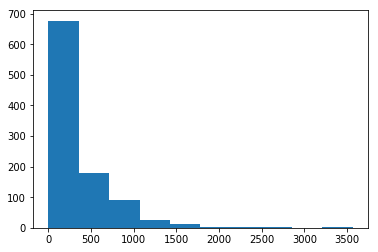

In [83]:
%pylab inline
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()

def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)
    plt.hist(data)

describe_data(total_minutes)

## Debugging Data Analysis Code

In [84]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.
student_with_max_minuts = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minuts = student
        
max_minutes

3564.7332644989997

In [85]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minuts:
        print(engagement_record)

{u'lessons_completed': 4, u'num_courses_visited': 4, 'has_visited': 1, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, 'has_visited': 1, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, 'has_visited': 1, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'account_key': u'163

## Lessons Completed in First Week

In [86]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

def total_x_by_account(data, x):
    total_by_account = {}
    for account_key, row in data.items():
        total = 0
        for record in row:
            total += record[x]
        total_by_account[account_key] = total
    return total_by_account

total_lessons_by_account = total_x_by_account(engagement_by_account, 'lessons_completed' )
len(total_lessons_by_account)

995

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


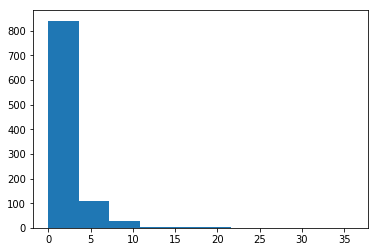

In [87]:
total_lessons = total_lessons_by_account.values()

describe_data(total_lessons)

## Number of Visits in First Week

In [88]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.


Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


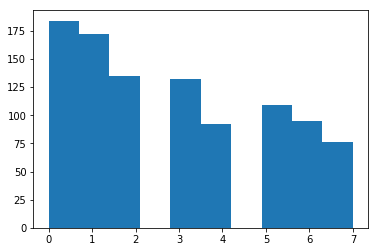

In [89]:
total_visits_by_account = sum_group_items(engagement_by_account, 'has_visited')
total_visits = total_visits_by_account.values()
describe_data(total_visits)

## Splitting out Passing Students

In [90]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

passing_engagement = []
non_passing_engagement = []

passed_students = set()

for submission in paid_submissions:
    if submission['lesson_key'] in subway_project_lesson_keys and (submission['assigned_rating'] == 'PASSED' \
                                                                   or submission['assigned_rating'] == 'DISTINCTION'):
        passed_students.add(submission['account_key'])
len(passed_students)

for data_point in paid_engagement_in_first_week:
    if data_point['account_key'] in passed_students:
        passing_engagement.append(data_point)
    else:
        non_passing_engagement.append(data_point)
        
print(len(passing_engagement))
print(len(non_passing_engagement))

4527
2392


## Comparing the Two Student Groups

In [91]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

In [92]:
passing_engagement[0]

{'account_key': u'0',
 'has_visited': 1,
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

*** Total minutes visited stats ***
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645
****************************************

*** Total lessons completed stats ***
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36
****************************************

*** Total courses visited stats ***
Mean: 4.72642967543
Standard deviation: 3.7002397793
Minimum: 0
Maximum: 25
****************************************

*** Total visits stats ***
Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7
****************************************



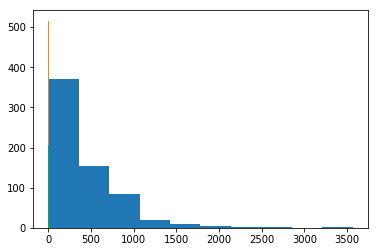

In [93]:
# Passing group: minutes spent insight

passing_by_account = group_data(passing_engagement, 'account_key')
passing_total_minutes_by_account = sum_group_items(passing_by_account, 'total_minutes_visited')
passing_total_minutes = passing_total_minutes_by_account.values()

passing_total_lessons_by_account = sum_group_items(passing_by_account, 'lessons_completed')
passing_total_lessons = passing_total_lessons_by_account.values()

passing_total_courses_visited_by_account = sum_group_items(passing_by_account, 'num_courses_visited')
passing_total_courses_visited = passing_total_courses_visited_by_account.values()

passing_total_visits_by_account = sum_group_items(passing_by_account, 'has_visited')
passing_total_visits = passing_total_visits_by_account.values()

print("*** Total minutes visited stats ***")
describe_data(passing_total_minutes)
print('**'*20+'\n')
print("*** Total lessons completed stats ***")
describe_data(passing_total_lessons)
print('**'*20+'\n')
print("*** Total courses visited stats ***")
describe_data(passing_total_courses_visited)
print('**'*20+'\n')
print("*** Total visits stats ***")
describe_data(passing_total_visits)
print('**'*20+'\n')

*** Total minutes visited stats ***
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933
****************************************

*** Total lessons completed stats ***
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27
****************************************

*** Total courses visited stats ***
Mean: 2.58908045977
Standard deviation: 2.90670969025
Minimum: 0
Maximum: 18
****************************************

*** Total visits stats ***
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7
****************************************



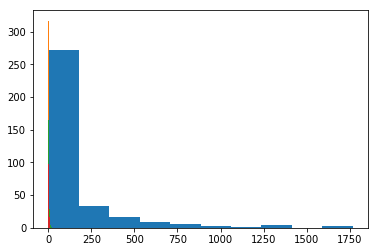

In [94]:
# Non-passing group insights

non_passing_by_account = group_data(non_passing_engagement, 'account_key')
non_passing_total_minutes_by_account = sum_group_items(non_passing_by_account, 'total_minutes_visited')
non_passing_total_minutes = non_passing_total_minutes_by_account.values()

non_passing_total_lessons_by_account = sum_group_items(non_passing_by_account, 'lessons_completed')
non_passing_total_lessons = non_passing_total_lessons_by_account.values()

non_passing_total_courses_visited_by_account = sum_group_items(non_passing_by_account, 'num_courses_visited')
non_passing_total_courses_visited = non_passing_total_courses_visited_by_account.values()

non_passing_total_visits_by_account = sum_group_items(non_passing_by_account, 'has_visited')
non_passing_total_visits = non_passing_total_visits_by_account.values()



print("*** Total minutes visited stats ***")
describe_data(non_passing_total_minutes)
print('**'*20+'\n')
print("*** Total lessons completed stats ***")
describe_data(non_passing_total_lessons)
print('**'*20+'\n')
print("*** Total courses visited stats ***")
describe_data(non_passing_total_courses_visited)
print('**'*20+'\n')
print("*** Total visits stats ***")
describe_data(non_passing_total_visits)
print('**'*20+'\n')

## Making Histograms

(array([ 272.,   34.,   17.,    9.,    6.,    2.,    1.,    5.,    0.,    2.]),
 array([    0.        ,   176.85227493,   353.70454987,   530.5568248 ,
          707.40909973,   884.26137467,  1061.1136496 ,  1237.96592453,
         1414.81819947,  1591.6704744 ,  1768.52274933]),
 <a list of 10 Patch objects>)

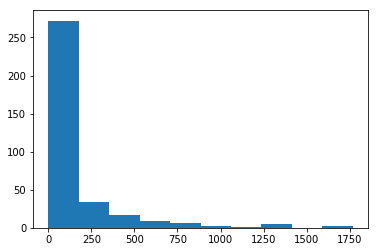

In [95]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(non_passing_total_minutes)
# plt.hist(passing_total_minutes)

(array([ 370.,  155.,   83.,   19.,   10.,    4.,    2.,    3.,    0.,    1.]),
 array([    0.        ,   356.47332645,   712.9466529 ,  1069.41997935,
         1425.8933058 ,  1782.36663225,  2138.8399587 ,  2495.31328515,
         2851.7866116 ,  3208.25993805,  3564.7332645 ]),
 <a list of 10 Patch objects>)

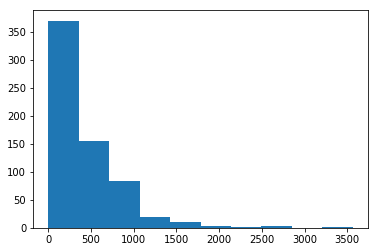

In [96]:
plt.hist(passing_total_minutes)

(array([ 317.,   17.,    6.,    4.,    1.,    1.,    0.,    1.,    0.,    1.]),
 array([  0. ,   2.7,   5.4,   8.1,  10.8,  13.5,  16.2,  18.9,  21.6,
         24.3,  27. ]),
 <a list of 10 Patch objects>)

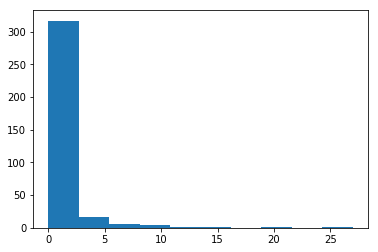

In [97]:
plt.hist(non_passing_total_lessons)

(array([ 516.,   97.,   23.,    4.,    3.,    3.,    0.,    0.,    0.,    1.]),
 array([  0. ,   3.6,   7.2,  10.8,  14.4,  18. ,  21.6,  25.2,  28.8,
         32.4,  36. ]),
 <a list of 10 Patch objects>)

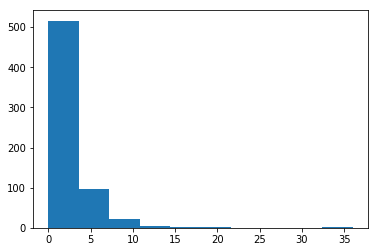

In [98]:
plt.hist(passing_total_lessons)

(array([ 97.,  90.,  56.,   0.,  41.,  15.,   0.,  24.,  17.,   8.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

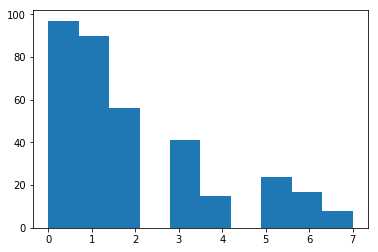

In [99]:
plt.hist(non_passing_total_visits)

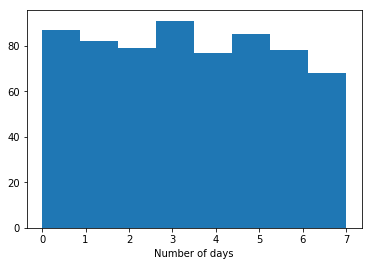

In [100]:
plt.hist(passing_total_visits, bins=8)
plt.xlabel('Number of days')

## Improving Plots and Sharing Findings

(array([ 97.,  90.,  56.,  41.,  15.,  24.,  17.,   8.]),
 array([ 0.   ,  0.875,  1.75 ,  2.625,  3.5  ,  4.375,  5.25 ,  6.125,  7.   ]),
 <a list of 8 Patch objects>)

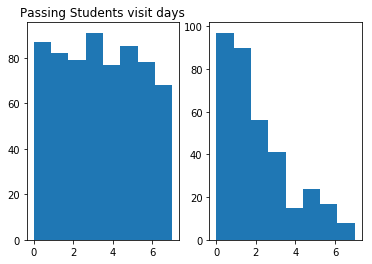

In [101]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2)
ax0, ax1 = axes.flatten()
bins = 8

ax0.hist(passing_total_visits, bins)
ax0.set_title('Passing Students visit days')
ax1.hist(non_passing_total_visits, bins)